In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

In [2]:
def accuracy(y, y_hat):    
    accuracy_score = (y == y_hat).mean()
    return accuracy_score

In [3]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)


poly_kernel_svm_clf = make_pipeline(StandardScaler(),  SVC(kernel="rbf", gamma=5, C=0.001)) 
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

SVC_rbf: C, train_acc =  0.001 0.85


C:\Users\guhat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC_rbf: C, train_acc =  1000 0.915
SVC_rbf: C, train_acc =  0.001 0.904


C:\Users\guhat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC_rbf: C, train_acc =  1000 0.943


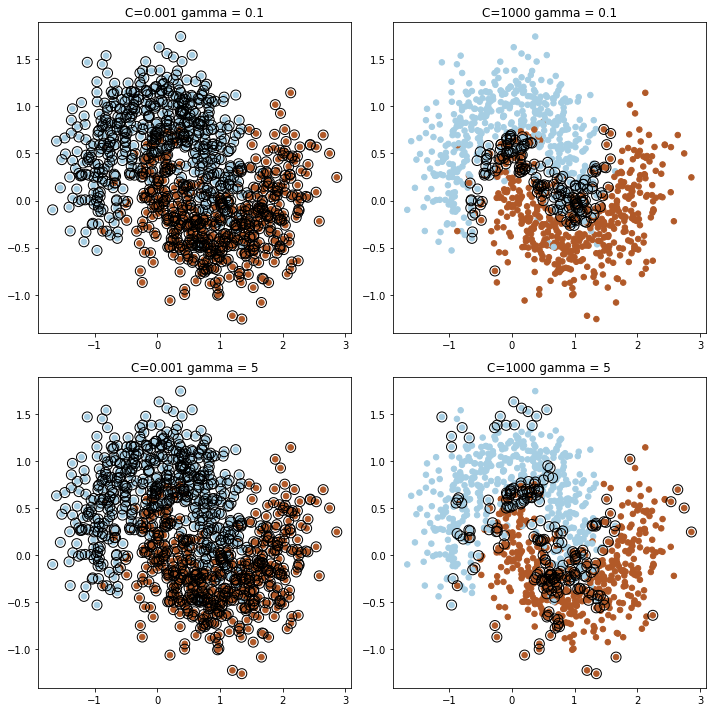

In [5]:
#train and plot the decision boundary

scaled_features = make_pipeline(StandardScaler())

plt.figure(figsize=(10, 10))

for i, gamma in enumerate([.1, 5]):
    for j, C in enumerate([0.001, 1000]):
        
        # "hinge" is the standard SVM loss

        full_pipeline = make_pipeline(scaled_features, 
        SVC(C=C, kernel = "rbf", gamma = gamma, max_iter=3000))

        clf = full_pipeline.fit(X, y)

        #compute the accuracy of train

        y_train_predictions = clf.predict(X)

        train_acc = accuracy(y, y_train_predictions)

        print("SVC_rbf: C, train_acc = ", str(C), train_acc)


        #clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)

        # obtain the support vectors through the decision function
        decision_function = clf.decision_function(X)
        # we can also calculate the decision function manually
        # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
        # The support vectors are the samples that lie within the margin
        # boundaries, whose size is conventionally constrained to 1
        support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
        support_vectors = X[support_vector_indices]

        plt.subplot(2, 2, i * 2 + j + 1)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
        ax = plt.gca()
    #    DecisionBoundaryDisplay.from_estimator(
    #        clf,
    #        X,
    #        ax=ax,
    #        grid_resolution=50,
    #        plot_method="contour",
    #        colors="k",
    #        levels=[-1, 0, 1],
    #        alpha=0.5,
    #        linestyles=["--", "-", "--"],
    #    )
        plt.scatter(
            support_vectors[:, 0],
            support_vectors[:, 1],
            s=100,
            linewidth=1,
            facecolors="none",
            edgecolors="k",
        )
        plt.title("C=" + str(C) + " gamma = " + str(gamma))
plt.tight_layout()
plt.show()